<a href="https://colab.research.google.com/github/ISHRAT-JAHAN-T/Machine-Learning-Part-1/blob/main/insurancefile_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

!git clone https://github.com/ISHRAT-JAHAN-T/Machine-Learning-Part-1

fatal: destination path 'Machine-Learning-Part-1' already exists and is not an empty directory.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
!pwd

/content


In [7]:
!ls

Machine-Learning-Part-1  sample_data


In [8]:
%cd Machine-Learning-Part-1

/content/Machine-Learning-Part-1


In [9]:
!ls

anaconda_projects  Heart.ipynb	  insurance.ipynb
heart.csv	   insurance.csv  machine_learning_part1.ipynb


In [10]:
df = pd.read_csv('insurance.csv')

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


EDA = Exploratory Data Analysis.  
Get to know your data before modeling.



In [12]:
df.shape

(1338, 7)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [17]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
numeric_columns=['age',  'bmi', 'children','charges']

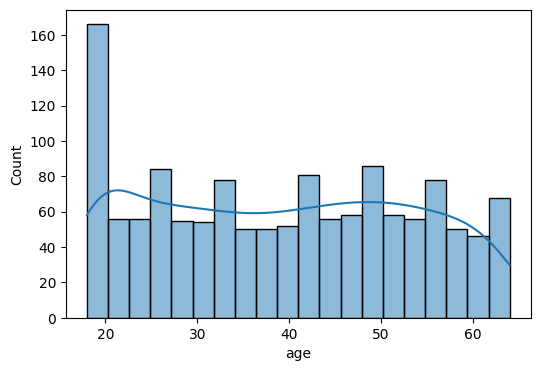

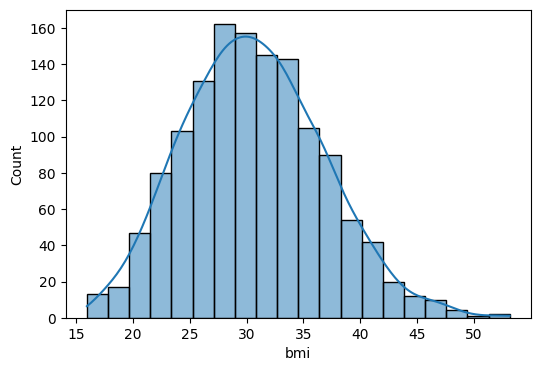

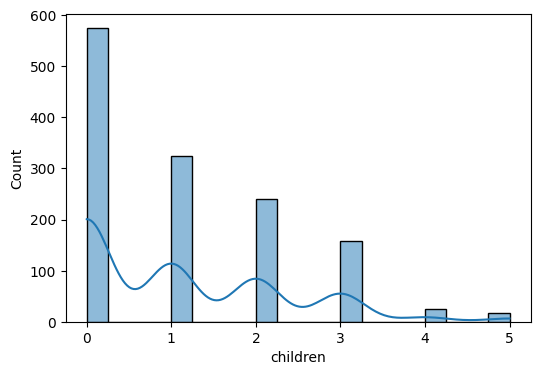

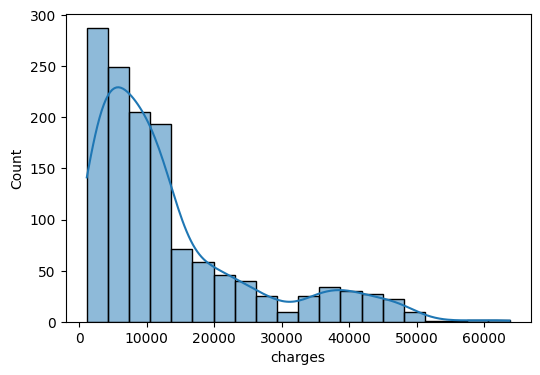

In [19]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)


<Axes: xlabel='children', ylabel='count'>

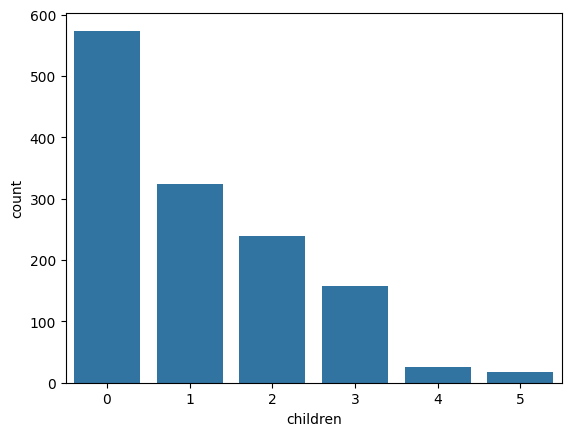

In [20]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

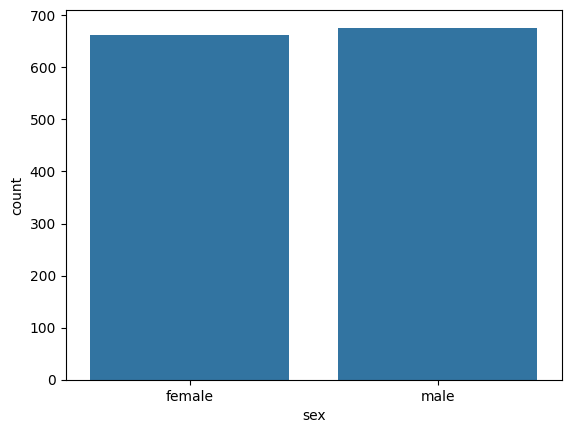

In [21]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

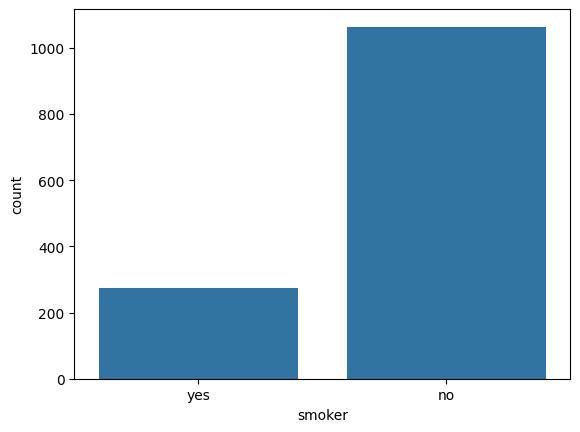

In [22]:
sns.countplot(x=df['smoker'])

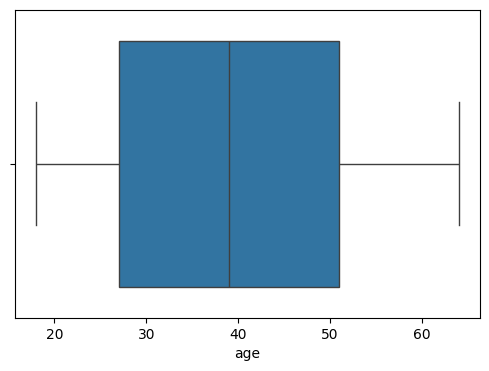

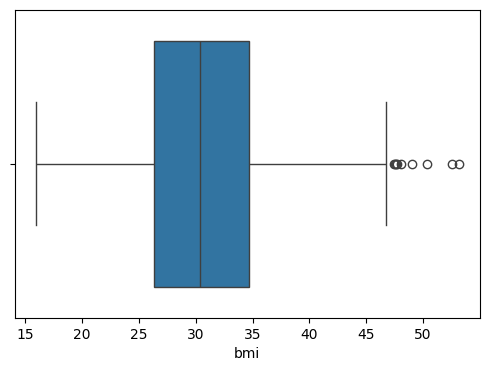

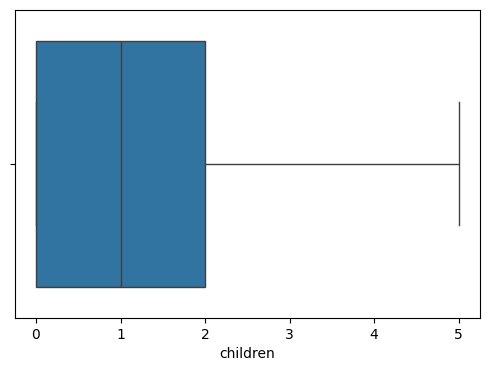

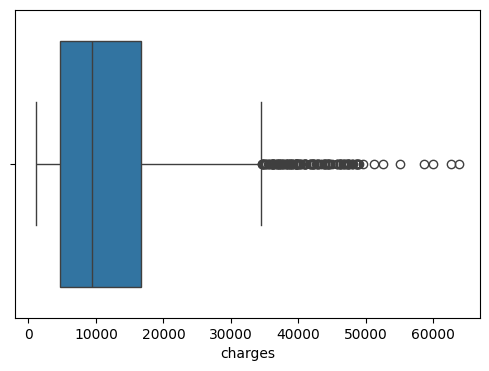

In [23]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])

<Axes: xlabel='charges', ylabel='Count'>

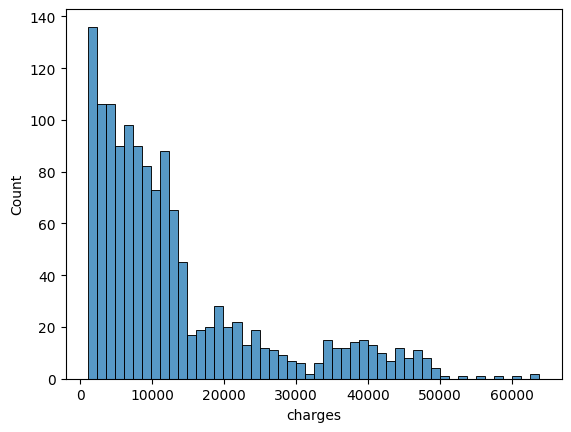

In [24]:
df['charges'].describe()
sns.histplot(df['charges'], bins=50)


<Axes: >

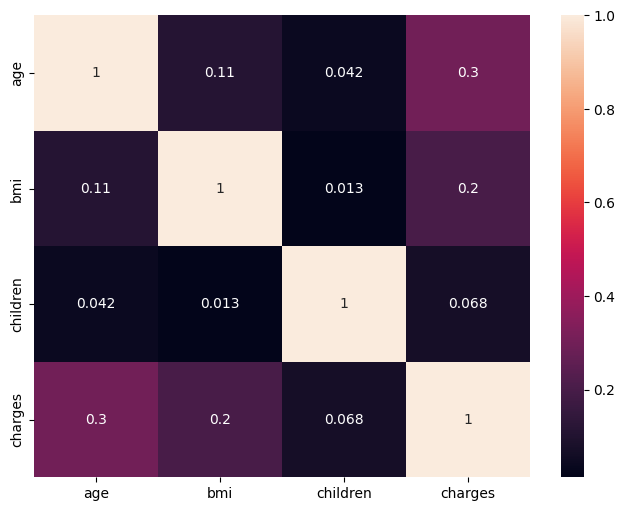

In [25]:
from matplotlib.text import Annotation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)


<Axes: xlabel='sex', ylabel='count'>

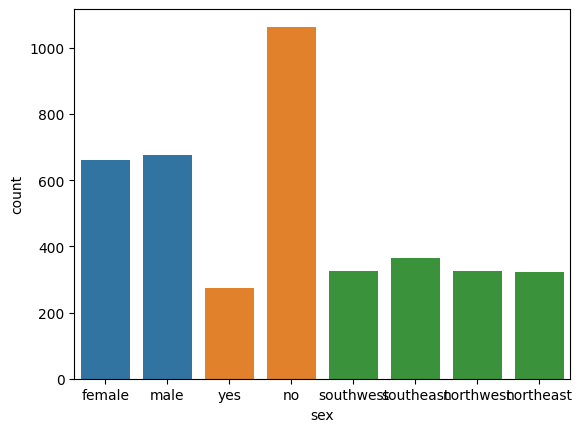

In [26]:
sns.countplot(x='sex', data=df)
sns.countplot(x='smoker', data=df)
sns.countplot(x='region', data=df)


<Axes: xlabel='smoker', ylabel='charges'>

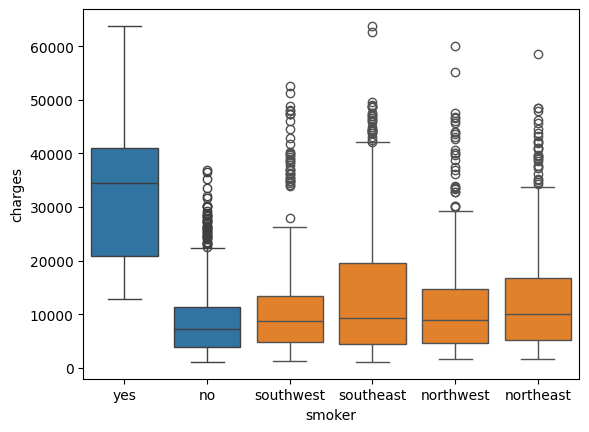

In [27]:
sns.boxplot(x='smoker', y='charges', data=df)
sns.boxplot(x='region', y='charges', data=df)


<Axes: xlabel='age', ylabel='charges'>

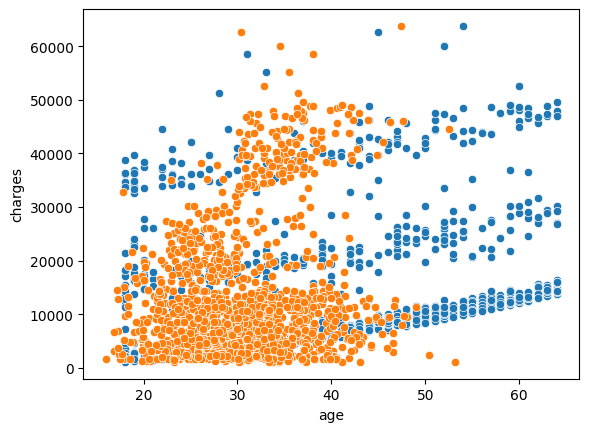

In [28]:
sns.scatterplot(x='age', y='charges', data=df)
sns.scatterplot(x='bmi', y='charges', data=df)


Data cleaning and pre-processing


In [29]:
df_cleaned=df.copy()


In [30]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df_cleaned.shape

(1338, 7)

In [33]:
df_cleaned.drop_duplicates(inplace=True)

In [34]:
df_cleaned.shape


(1337, 7)

In [35]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [36]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [37]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [38]:
df_cleaned['sex']=df_cleaned['sex'].map({ 'male' : 0, 'female' : 1 })

In [39]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [40]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [41]:
df_cleaned['smoker']=df_cleaned['smoker'].map({ 'no' : 0, 'yes' : 1 })

In [42]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [43]:
df_cleaned.rename(
    columns={
        'sex': 'is_female',
        'smoker': 'is_smoker'
    },
    inplace=True
)


In [44]:
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [45]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [46]:
df_cleaned = pd.get_dummies(
    df_cleaned,
    columns=['region'],
    drop_first=True
)


In [47]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [48]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [49]:
df_cleaned=df_cleaned.astype(int)

In [50]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


In [51]:
# numeric columns → fill with median
num_cols = ['age', 'bmi', 'children', 'charges']
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())


In [52]:
df_cleaned.shape

(1337, 9)

In [53]:
df_cleaned['bmi'].describe()


,bmi
count,1337.000000
mean,30.169783
std,6.122163
min,15.000000
25%,26.000000
50%,30.000000
75%,34.000000
max,53.000000


In [54]:
df_cleaned = df_cleaned[df_cleaned['bmi'] > 10]


In [55]:
df_cleaned.shape

(1337, 9)

In [56]:
df_cleaned['log_charges'] = np.log(df_cleaned['charges'])

In [57]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
0,19,1,27,0,1,16884,0,0,1,9.734122
1,18,0,33,1,0,1725,0,1,0,7.452982
2,28,0,33,3,0,4449,0,1,0,8.400435
3,33,0,22,0,0,21984,1,0,0,9.998070
4,32,0,28,0,0,3866,1,0,0,8.259976


In [58]:
df_cleaned.describe()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.169783,1.095737,0.204936,13278.628272,0.242334,0.272251,0.243082,9.099844
std,14.044333,0.500163,6.122163,1.205571,0.403806,12110.361125,0.428655,0.445285,0.429104,0.918773
min,18.000000,0.000000,15.000000,0.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,7.021976
25%,27.000000,0.000000,26.000000,0.000000,0.000000,4746.000000,0.000000,0.000000,0.000000,8.465057
50%,39.000000,0.000000,30.000000,1.000000,0.000000,9386.000000,0.000000,0.000000,0.000000,9.146974
75%,51.000000,1.000000,34.000000,2.000000,0.000000,16657.000000,0.000000,1.000000,0.000000,9.720586
max,64.000000,1.000000,53.000000,5.000000,1.000000,63770.000000,1.000000,1.000000,1.000000,11.063038


In [59]:
df_cleaned = df_cleaned[(df_cleaned['bmi'] > 10) & (df_cleaned['bmi'] < 60)]


Feature Engineering and Extraction


In [60]:
df_cleaned['bmi_category']=pd.cut(
  df_cleaned['bmi'],
  bins=[0,18.5,24.9,29.9,float('inf')],
  labels=['Underweight','Normal','Overweight','Obese']

)

In [61]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges,bmi_category
0,19,1,27,0,1,16884,0,0,1,9.734122,Overweight
1,18,0,33,1,0,1725,0,1,0,7.452982,Obese
2,28,0,33,3,0,4449,0,1,0,8.400435,Obese
3,33,0,22,0,0,21984,1,0,0,9.998070,Normal
4,32,0,28,0,0,3866,1,0,0,8.259976,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,9.268609,Obese
1334,18,1,31,0,0,2205,0,0,0,7.698483,Obese
1335,18,1,36,0,0,1629,0,1,0,7.395722,Obese
1336,21,1,25,0,0,2007,0,0,1,7.604396,Overweight


In [62]:
df_cleaned = pd.get_dummies(
    df_cleaned,
    columns=['bmi_category'],
    drop_first=True
)

In [63]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,9.734122,False,True,False
1,18,0,33,1,0,1725,0,1,0,7.452982,False,False,True
2,28,0,33,3,0,4449,0,1,0,8.400435,False,False,True
3,33,0,22,0,0,21984,1,0,0,9.998070,True,False,False
4,32,0,28,0,0,3866,1,0,0,8.259976,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,9.268609,False,False,True
1334,18,1,31,0,0,2205,0,0,0,7.698483,False,False,True
1335,18,1,36,0,0,1629,0,1,0,7.395722,False,False,True
1336,21,1,25,0,0,2007,0,0,1,7.604396,False,True,False


In [64]:
df_cleaned=df_cleaned.astype(int)

In [65]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,9,0,1,0
1,18,0,33,1,0,1725,0,1,0,7,0,0,1
2,28,0,33,3,0,4449,0,1,0,8,0,0,1
3,33,0,22,0,0,21984,1,0,0,9,1,0,0
4,32,0,28,0,0,3866,1,0,0,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,9,0,0,1
1334,18,1,31,0,0,2205,0,0,0,7,0,0,1
1335,18,1,36,0,0,1629,0,1,0,7,0,0,1
1336,21,1,25,0,0,2007,0,0,1,7,0,1,0


In [66]:
from sklearn.preprocessing import StandardScaler
cols=['age', 'bmi', 'children']
scaler=StandardScaler()

df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])


In [67]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,9,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,7,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,8,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,9,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,8,0,1,0


In [68]:
from scipy.stats import pearsonr
import pandas as pd

# Pearson correlation
# List of features to check against target: log_charges
selected_features = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight',
    'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['log_charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(
    correlations.items(),
    columns=['Feature', 'Pearson Correlation']
)

correlation_df = correlation_df.sort_values(
    by='Pearson Correlation',
    ascending=False
)

correlation_df


,Feature,Pearson Correlation
4,is_smoker,0.592625
0,age,0.558404
3,children,0.148920
2,bmi,0.123144
10,bmi_category_Obese,0.121111
6,region_southeast,0.023044
1,is_female,-0.008015
5,region_northwest,-0.031052
7,region_southwest,-0.037690
9,bmi_category_Overweight,-0.060262


In [69]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight',
    'bmi_category_Obese'
]


In [70]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'log_charges', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese'],
      dtype='object')

In [71]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,log_charges,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,9,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,7,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,8,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,9,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,8,0,1,0


In [72]:
df_cleaned.drop(columns=['log_charges'], inplace=True)


In [73]:
import pandas as pd
from scipy.stats import chi2_contingency

# -----------------------------
# Categorical features to test
# -----------------------------
cat_features = [
    'is_female',
    'is_smoker',
    'region_northwest',
    'region_southeast',
    'region_southwest',
    'bmi_category_Normal',
    'bmi_category_Overweight',
    'bmi_category_Obese'
]

# -----------------------------
# Significance level
# -----------------------------
alpha = 0.05

# -----------------------------
# Bin target variable (charges)
# -----------------------------
df_cleaned['charges_bin'] = pd.qcut(
    df_cleaned['charges'],
    q=4,
    labels=False
)

# -----------------------------
# Chi-square tests
# -----------------------------
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(
        df_cleaned[col],
        df_cleaned['charges_bin']
    )

    chi2_stat, p_val, _, _ = chi2_contingency(contingency)

    decision = (
        'Reject Null (Keep Feature)'
        if p_val < alpha
        else 'Accept Null (Drop Feature)'
    )

    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# -----------------------------
# Results as sorted DataFrame
# -----------------------------
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')

chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [74]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'charges_bin'],
      dtype='object')

In [75]:
final_df=df_cleaned[

        ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_southeast','bmi_category_Obese']

]

In [76]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [77]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
from sklearn.model_selection import train_test_split

In [82]:
X=final_df.drop('charges',axis=1)
y=final_df['charges']

In [ ]:
train_test_split()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred=model.predict(X_test)

In [91]:
y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [92]:
y_test

,charges
900,8688
1064,5708
1256,11436
298,38746
237,4463
...,...
534,13831
542,13887
760,3925
1284,47403


In [93]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8040712413347119

In [95]:
n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2=1-(   (1-r2)*(n-1)/(n-p-1)    )
adjusted_r2

0.7987962362937233